In [8]:
# For reproducing plots or algorithms
# for probabilistic programming (bayesian inference)
# Smith2014 = "Uncertainty Quantification: Theory, 
# Implementation and Practice", SIAM
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp 

## Smith Ch. 8.1

In [33]:
def spring_model(t, y, C, K):
    """Spring displacement model.    

    ```
    # Governing equations
    z'' + C*z' + K*z = 0
    z'' = -C*z' - K*z
    # Transformation to linear sys first order ODEs
    y1  = z
    y2  = z' 
    y1' = z'  = y2 
    y2' = z'' = -C*y2 - K*y1 
    # Taking into account 0 indexing
    ydot0 = y1
    ydot1 = -C*y1 - K*y0
    ```

    References:
        Example 8.2 from Smith2014
    """
    return [y[1], -C*y[1] - K*y[0]]

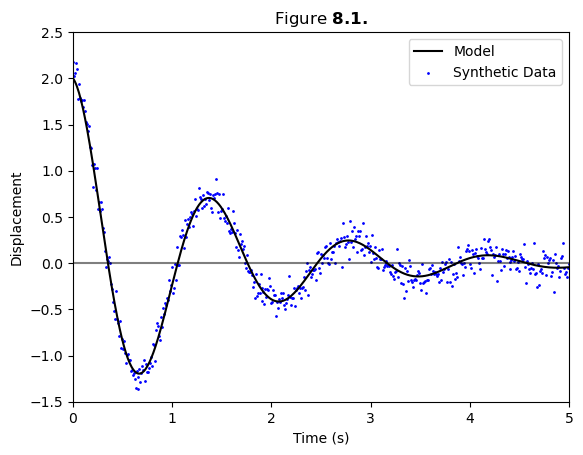

In [47]:
# init conditions from example 8.2
# state that z(0) = 2 and zdot(0) = -C
# therefore, y[0]_{t=0} = z_{t=0} = 2 and 
# y[1]_{t=0} = zdot_{t=0} = -C
C0 = 1.5
K = 20.5
y0 = [2, -C0]

# timestep parameters
t0 = 0
tf = 5
npoints = 501
t_eval = np.linspace(t0, tf, npoints)

# Solve model
spring_model_sol = solve_ivp(
    spring_model,
    t_span=(t0, tf),
    y0=y0, 
    args=(C0, K),
    t_eval=t_eval)

# Plot model
displacement_z = spring_model_sol.y[0, :]
plt.plot(t_eval, displacement_z, label = "Model", color="black")
plt.axhline(y=0, color="k", alpha=0.5)

# Errors points perturbed from model output
sigma_0 = 0.1
error_i = lambda : np.random.normal(0, scale=sigma_0)
np.random.seed(0)
synthetic_data_v = [z_i + error_i() for z_i in displacement_z]

# Plot error
plt.scatter(
    t_eval, synthetic_data_v, s=1, color="blue", label="Synthetic Data")

# Labeling
plt.xlim(0, 5)
plt.ylim(-1.5, 2.5)
plt.title(r"Figure $\mathbf{8.1.}$")
plt.xlabel("Time (s)")
plt.ylabel("Displacement")
plt.legend()